In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("../data/processed/features.csv")

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [37]:
df.head()

,order_id,customer_id,trip_distance,pickup_latitude,pickup_longitude,date,time,timestamp,driver_id_pnt,driver_latitude,...,pick_up_distance,created_weekday,created_hour_weekofyear,created_hour,pickup_cluster,driver_cluster,is_region_diff,pickup_datetime_group,driver_cluster_count,pickup_cluster_count
0,113947347802,352787792790,2.0,-2.981196,104.718829,2015-05-18,04:32:01.549,2015-05-18 04:32:01.549,4.766568e+11,-2.981254,...,0.000013,0,21,4,9,9,0,2015-05-18 05:00:00.000,290.25,282.75
1,209915120110,725333969587,2.0,-2.982890,104.738268,2015-05-15,09:11:43.29,2015-05-15 09:11:43.290,2.300982e+11,-2.984737,...,0.000037,4,20,9,32,32,0,2015-05-15 09:00:00.000,212.50,197.50
2,298115671619,715281995014,2.0,-2.998464,104.788078,2015-05-16,05:41:45.465,2015-05-16 05:41:45.465,5.050299e+11,-2.994366,...,0.000072,5,20,5,24,24,0,2015-05-16 06:00:00.000,117.25,125.50
3,318512932419,129838375320,2.0,-2.926193,104.714076,2015-05-14,09:00:50.362,2015-05-14 09:00:50.362,2.520253e+11,-2.923397,...,0.000050,3,20,9,16,16,0,2015-05-14 09:00:00.000,159.25,157.00
4,321285182080,369840291400,2.0,-2.978029,104.784925,2015-05-16,05:27:42.371,2015-05-16 05:27:42.371,1.379526e+11,-2.979506,...,0.000026,5,20,5,19,19,0,2015-05-16 05:00:00.000,142.00,138.50


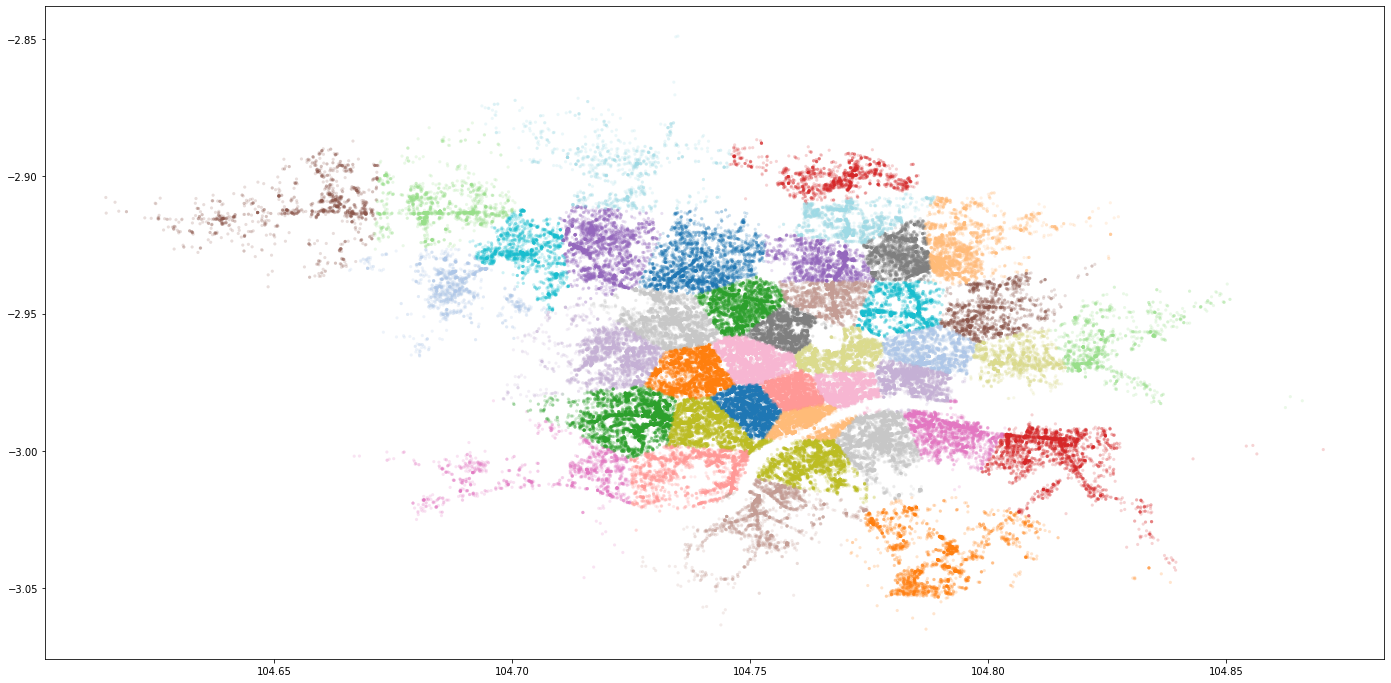

In [18]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (24, 12))
ax.scatter(df.pickup_longitude.values, df.pickup_latitude.values, s=10, lw=0,
           c=df.pickup_cluster.values, cmap='tab20', alpha=0.2)

In [10]:
ratio_neg = len(df[df['label'] == 0])/(len(df[df['label'] == 1]) + len(df[df['label'] == 0]))
print (ratio_neg)

0.2417578109686777


In [43]:
label_mapping = {1: 'completed', 0: 'not_completed'}
df['label_value'] = df['label'].map(label_mapping)

In [42]:
df.columns

Index(['order_id', 'customer_id', 'trip_distance', 'pickup_latitude',
       'pickup_longitude', 'date', 'time', 'timestamp', 'driver_id_pnt',
       'driver_latitude', 'driver_longitude', 'label', 'pick_up_distance',
       'created_weekday', 'created_hour_weekofyear', 'created_hour',
       'pickup_cluster', 'driver_cluster', 'is_region_diff',
       'pickup_datetime_group', 'driver_cluster_count', 'pickup_cluster_count',
       'label_value'],
      dtype='object')

In [12]:
select_features = ['trip_distance', 'pick_up_distance', 'pickup_latitude', 'pickup_longitude', 'created_weekday', 'created_hour_weekofyear',
                   'created_hour', 'pickup_cluster', 'driver_cluster', 'is_region_diff', 'driver_cluster_count', 'pickup_cluster_count']

cat_features = ['created_weekday', 'created_hour_weekofyear', 
                'created_hour', 'pickup_cluster', 'driver_cluster', 'is_region_diff']

cnt_features = ['trip_distance', 'pick_up_distance',
                'pickup_latitude', 'pickup_longitude']

In [19]:
cat_features + cnt_features

['created_weekday',
 'created_hour_weekofyear',
 'created_hour',
 'pickup_cluster',
 'driver_cluster',
 'is_region_diff',
 'trip_distance',
 'pick_up_distance',
 'pickup_latitude',
 'pickup_longitude']

## Highly correlated features

In [53]:
df_temp = df.drop_duplicates('order_id')

In [33]:
corr = df_temp[cat_features + cnt_features].corr()

Text(0.5, 0.98, 'Dataset Features Heatmap')

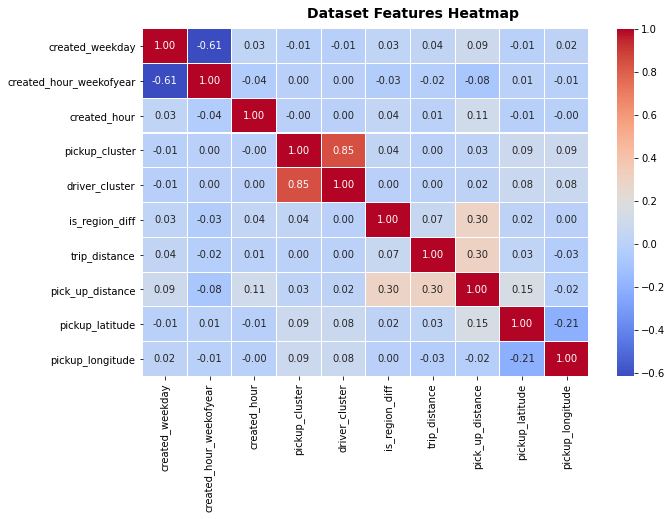

In [34]:
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           
                 cmap="coolwarm", 
                 annot=True, 
                 fmt='.2f',       
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Dataset Features Heatmap', 
              fontsize=14, 
              fontweight='bold')

## Features pairwise plots for latitude and longitude features. 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Dataset Features Pairwise Plots')

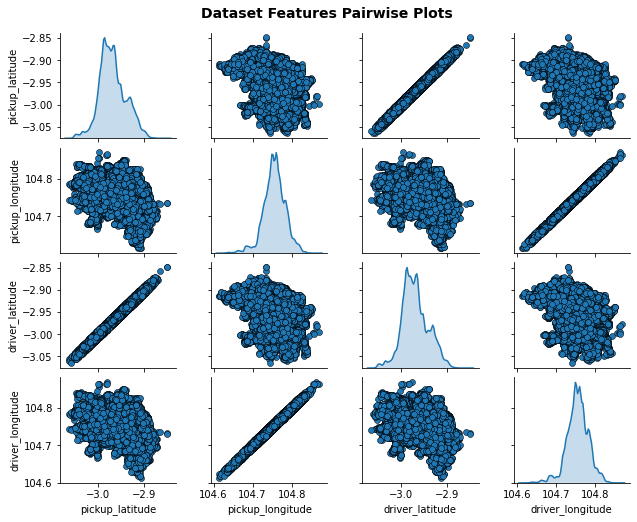

In [35]:
cols = ['pickup_latitude', 'pickup_longitude', 'driver_latitude', 'driver_longitude']

pp = sns.pairplot(df_temp[cols], 
                  size=1.8, aspect=1.2,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kws=dict(shade=True),
                  diag_kind="kde")

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Dataset Features Pairwise Plots', 
              fontsize=14, fontweight='bold')

## Differences in feature distribution based on label

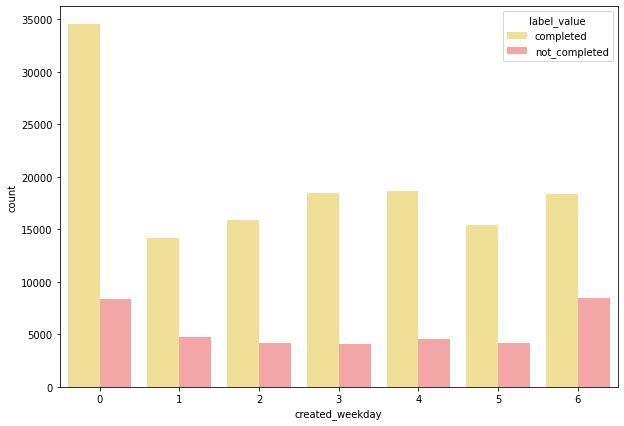

In [46]:
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=df, 
                   x="created_weekday", 
                   hue="label_value", 
                   palette={"not_completed": "#FF9999", "completed": "#FFE888"})

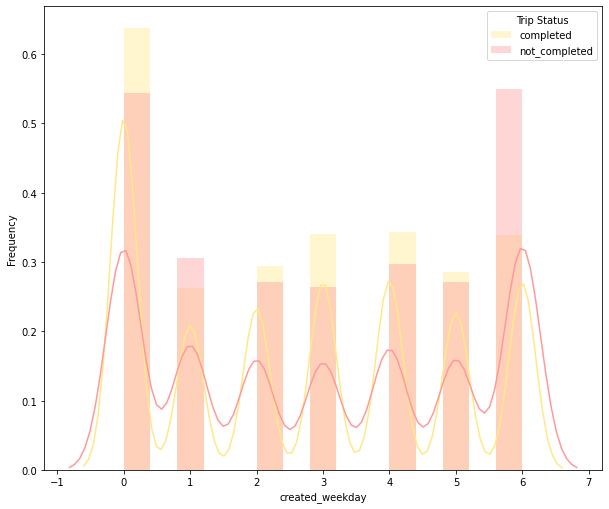

In [54]:
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("", fontsize=14)
fig.subplots_adjust(top=0.93, wspace=0.3)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(data=df_temp, 
                  hue="label_value", 
                  palette={"not_completed": "#FF9999", "completed": "#FFE888"})

g.map(sns.distplot, 'created_weekday', 
      kde=True, bins=15, ax=ax)

ax.legend(title='Trip Status')
plt.close(2)

## Finding out anomalies

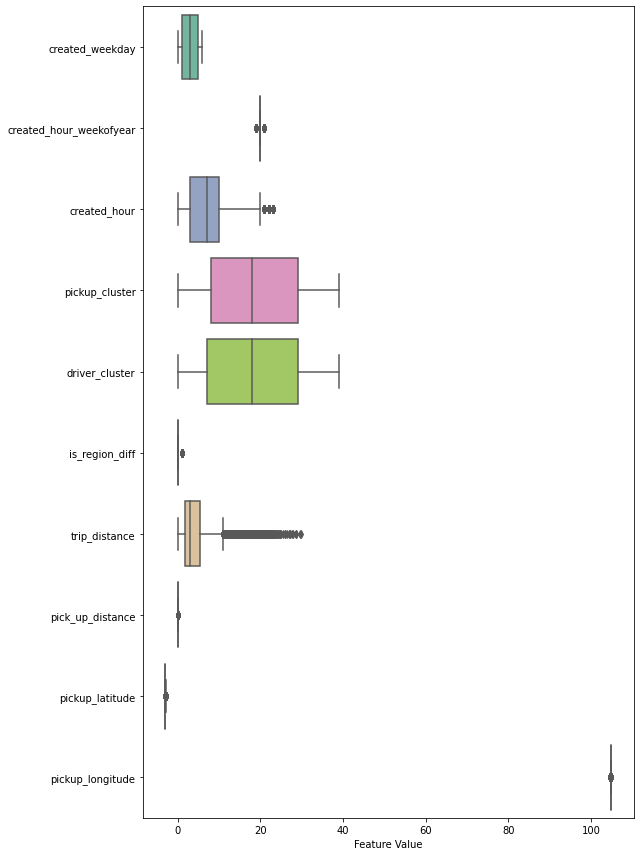

In [56]:
f, ax = plt.subplots(figsize=(9, 12))
sns.boxplot(data=df_temp[cat_features + cnt_features], orient="h", palette="Set2")

# Set axis label
plt.xlabel('Feature Value')

# Tight layout
f.tight_layout()